In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

In [5]:
# Read the GeoPackage file
Kano_MIcat = gpd.read_file('Kano_Reference_MIcat.gpkg')

# Convert from Mollweide (ESRI:54009) to WGS84 (EPSG:4326)
Kano_MIcat = Kano_MIcat.to_crs(epsg=4326)

# Convert to a pandas DataFrame without the geometry column
Kano_MIcat_df = pd.DataFrame(Kano_MIcat.drop(columns='geometry'))

# Print the DataFrame
print(Kano_MIcat_df.head())

# Check for null/NaN values in dataset
print(Kano_MIcat_df.isnull().sum())

# Replace NaN with 0 in population columns
Kano_MIcat_df['Pop_stddev'].fillna(0, inplace=True)
Kano_MIcat_df['Pop_mean'].fillna(0, inplace=True)
print(Kano_MIcat_df.isnull().sum())

# Map categorical values to integers
label_map = {'Low': 0, 'Med': 1, 'High': 2}

# Apply the mapping
Kano_MIcat_df['MI_cat'] = Kano_MIcat_df['MI_cat'].map(label_map)

   ISL_bin  SDS_bin  roadlength  Pop_mean  Pop_stddev  Intersections  \
0        0        0         0.0       NaN         NaN            0.0   
1        0        0         0.0       NaN         NaN            0.0   
2        0        0         0.0       NaN         NaN            0.0   
3        0        0         0.0       NaN         NaN            0.0   
4        0        0         0.0       NaN         NaN            0.0   

   Distance_mean MI_cat  
0    2002.498413   None  
1    2102.379639   None  
2    2202.271484   None  
3    2200.000000   None  
4    2100.000000   None  
ISL_bin               0
SDS_bin               0
roadlength            0
Pop_mean         124113
Pop_stddev       124113
Intersections         0
Distance_mean         0
MI_cat           325031
dtype: int64
ISL_bin               0
SDS_bin               0
roadlength            0
Pop_mean              0
Pop_stddev            0
Intersections         0
Distance_mean         0
MI_cat           325031
dtype: int64


In [6]:
# Filter the DataFrame to include only rows where MI_cat is not NaN
train_df = Kano_MIcat_df[Kano_MIcat_df['MI_cat'].notna()]

# Create a DataFrame with only the rows where MI_cat is NaN (to be used later for prediction)
#predict_df = sampled[sampled['MI_cat'].isna()]

# Define feature columns
feature_columns = ['SDS_bin', 'roadlength', 'Pop_mean', 'Pop_stddev', 'ISL_bin', 'Intersections', 'Distance_mean']

# Extract the features and target from the training DataFrame
X = train_df[feature_columns]
y = train_df['MI_cat']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can proceed with training the model
model = DecisionTreeRegressor(random_state=42, max_depth=3, criterion="squared_error")
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.31796561331207485
R-squared: 0.655183594393348


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font

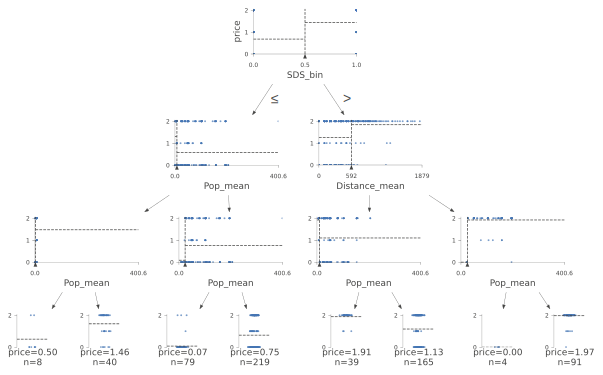

In [5]:
import dtreeviz

viz = dtreeviz.model(model, X, y,
                target_name="price",
                feature_names=X.columns)

viz.view()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


Mean Squared Error: 0.6282324570356068
R-squared: 0.3124808419354509


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

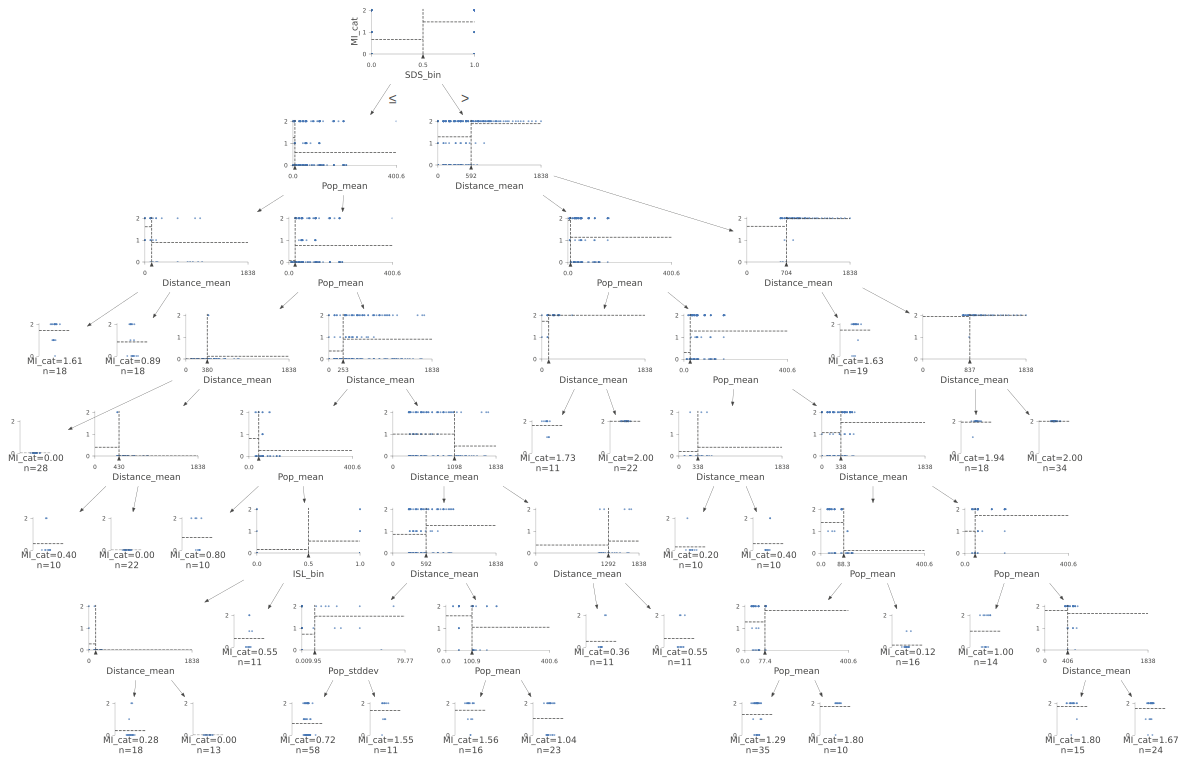

In [6]:
# Now you can proceed with training the model
model = DecisionTreeRegressor(random_state=42, max_depth=7, min_samples_leaf=10)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Import libraries
import matplotlib.pyplot as plt
import dtreeviz
import matplotlib.font_manager as fm

# Locate the DejaVu Sans font
font_path = fm.findfont("DejaVu Sans")

# Set it as the default font
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'DejaVu Sans'

# Proceed with your visualization
viz = dtreeviz.model(
    model,
    X_train,
    y_train,
    target_name="MI_cat",
    feature_names=X_train.columns.tolist()
)

viz.view()

In [7]:
### using gridded or random search method to find the optimal hyperparameters

In [8]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define hyperparameter grid
param_grid = {
    
    'max_depth': [2, 4, 8, 16, 32],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [10, 30, 50]
}

# Grid search
grid_search = GridSearchCV(model, param_grid, cv=10)
grid_search.fit(X, y)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_) #The default score is R2

Best parameters: {'max_depth': 4, 'min_samples_leaf': 30, 'min_samples_split': 10}
Best score: 0.19847730851557466


In [9]:
best_dt = grid_search.best_estimator_
best_dt

DecisionTreeRegressor(max_depth=4, min_samples_leaf=30, min_samples_split=10,
                      random_state=42)

In [10]:
### random search approach

In [11]:
# Random search
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 5, 10, 15, 20]
}

random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=45, cv=5)
random_search.fit(X, y)

# Best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_) #The default score is R2

Best parameters: {'min_samples_split': 50, 'min_samples_leaf': 1, 'max_depth': 4}
Best score: 0.15224684783804301


In [12]:
X_all = train_df[feature_columns]

model_all = DecisionTreeRegressor(random_state=42)
grid_search_all = GridSearchCV(model_all, param_grid, cv=5)
grid_search_all.fit(X_all, y)

# Best parameters and score
print("Best parameters:", grid_search_all.best_params_)
print("Best score:", grid_search_all.best_score_) #The default score is R2

Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 40}
Best score: 0.1590944875812173
